# Task 3

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse 

G = pd.read_pickle('bigger_graph.pickle')
G

Number of nodes: 2767
Number of edges: 229384
Average degree: 165.79978315865557
Is the graph connected? True
Number of connected components: 1


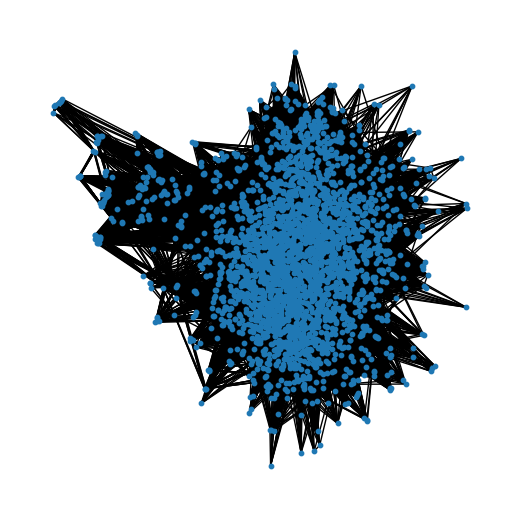

In [10]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
degrees = [G.degree(n) for n in G.nodes()]
print(f"Average degree: {sum(degrees) / len(degrees)}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

plt.figure(figsize=(5, 5)) 
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels=False, node_size=10)
plt.show()

In [11]:
def recommend_songs_weighted(graph, input_song, num_recommendations=5):
    recommended_songs = []

    if input_song in graph.nodes:
        current_song = input_song
        visited = set([current_song])
        
        while len(recommended_songs) < num_recommendations:
            neighbors = list(graph[current_song])
            neighbor_weights = [(neighbor, graph.edges[current_song, neighbor]['weight']) for neighbor in neighbors if neighbor not in visited]
            
            if not neighbor_weights:
                break
            
            # Sort neighbors by edge weights in descending order
            neighbor_weights.sort(key=lambda x: x[1], reverse=True)
            
            next_song = neighbor_weights[0][0]
            recommended_songs.append((next_song, neighbor_weights[0][1]))
            visited.add(next_song)
            current_song = next_song
        
        return recommended_songs
    else:
        print("Input song not found in the graph.")
        return None


input_song = "spotify:track:62vpWI1CHwFy7tMIcSStl8"  
num_recommendations = 5 
recommended_songs_weighted = recommend_songs_weighted(G, input_song, num_recommendations)
print("Recommended songs:")
for song in recommended_songs_weighted:
    print(song)

Recommended songs:
('spotify:track:16qYlQ6koFxYVbiJbGHblz', 7)
('spotify:track:5lFDtgWsjRJu8fPOAyJIAK', 6)
('spotify:track:27GmP9AWRs744SzKcpJsTZ', 7)
('spotify:track:2FBUoWkIuQXwayw2RNo5l6', 7)
('spotify:track:1xznGGDReH1oQq0xzbwXa3', 8)


## Community/Feature and Evaluation step 

In [12]:
import community as community_louvain

# Apply the Louvain method to find communities
partition = community_louvain.best_partition(G)

# The partition is a dictionary where the keys are the nodes and the values are the community IDs
# You can add this information as node attributes to the graph for easier access
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

unique_communities = set(node[1]['community'] for node in G.nodes(data=True))

# The number of unique communities is the length of the set
num_communities = len(unique_communities)
print(f"There are {num_communities} communities in the graph.")



There are 6 communities in the graph.


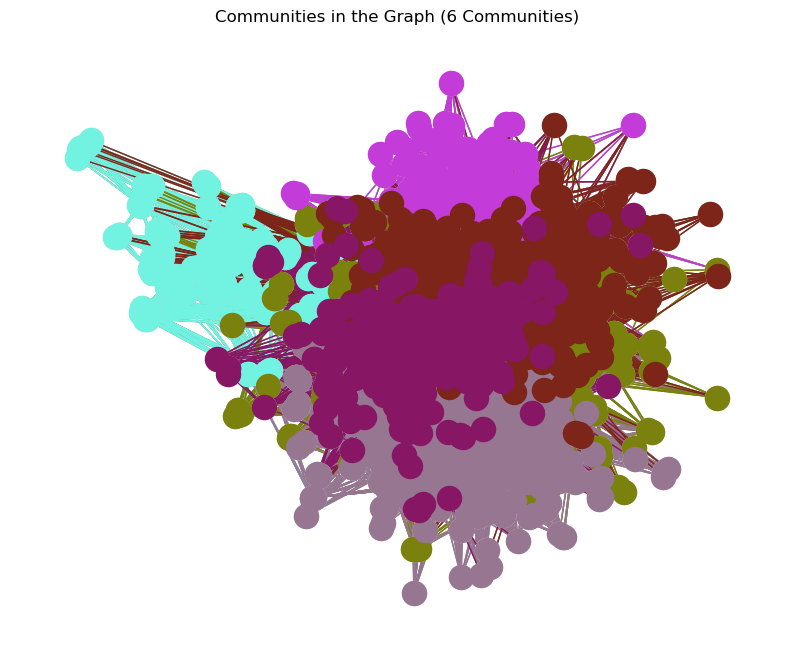

In [13]:
import random
num_communities = max(partition.values()) + 1

# Generate random colors for each community
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_communities)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightgray', ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

# Draw each community with a different color
for community_id in range(num_communities):
    community_nodes = [node for node, community in partition.items() if community == community_id]
    community_edges = G.edges(community_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=colors[community_id], ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=community_edges, edge_color=colors[community_id], ax=ax)

# Add labels and title
#nx.draw_networkx_labels(G, pos, ax=ax)
plt.title(f"Communities in the Graph ({num_communities} Communities)")
plt.axis('off')
plt.show()

In [ ]:
def get_song_community(song_name, graph):
    """
    Retrieves the community ID of a song in the graph.

    """
    # Try to get the node from the graph using the song name or ID
    try:
        node = graph.nodes[song_name]
    except KeyError:
        # If the song is not found in the graph, return None
        return None
    return node['community']

song_name = "spotify:track:1xznGGDReH1oQq0xzbwXa3" # Replace with the actual song name or ID
community_id = get_song_community(song_name, G)

if community_id is not None:
    print(f"The song '{song_name}' is in community {community_id}.")
else:
    print(f"The song '{song_name}' was not found in the graph.")